In [ ]:
# Install the Kaggle package quietly
!pip install -q kaggle

In [ ]:
import os  # Operating system functions
import cv2  # OpenCV for image processing
import time  # Time-related functions
import zipfile  # For working with zip files
import shutil  # For high-level file operations
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation and analysis
import seaborn as sns  # Statistical data visualization
import tensorflow as tf  # Deep learning library
import matplotlib.pyplot as plt  # Data visualization
import sklearn.metrics as metrics  # Metrics for evaluating models

from google.colab import files, drive  # Google Colab utilities
from tensorflow.keras.models import load_model  # Loading pre-trained models
from tensorflow.keras.preprocessing import image  # Image preprocessing
from tensorflow.keras import datasets, layers, models  # Keras for building models
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Image data augmentation
from sklearn.preprocessing import LabelEncoder  # Encoding categorical variables
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from IPython.display import clear_output  # Clearing output in IPython environment
from sklearn.metrics import confusion_matrix  # Confusion matrix for model evaluation

In [ ]:
# Upload Kaggle API key
files.upload()

# Create directory for Kaggle and move API key
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d 'giannisgeorgiou/fish-species'

In [ ]:
# Membuka file zip 'fish-species.zip' dalam mode baca ('r')
dataset_zip = zipfile.ZipFile('fish-species.zip', 'r')

# Mengekstraksi semua isi dari file zip ke dalam direktori saat ini
dataset_zip.extractall()

# Menutup file zip setelah ekstraksi selesai
dataset_zip.close()

In [ ]:
# Path ke set pelatihan, set uji, dan direktori target
train_set_path = "Species/Training_Set/"
test_set_path = "Species/Test_Set/"
target_path = "DATASETS/"

# Menyalin file dari set pelatihan ke direktori target
for folder in os.listdir(train_set_path):
    # Path target untuk setiap kelas
    target_folder_path = os.path.join(target_path, folder)

    # Buat direktori target jika belum ada
    if not os.path.exists(target_folder_path):
        os.makedirs(target_folder_path)

    # Salin setiap file dalam setiap folder ke direktori target
    for file in os.listdir(os.path.join(train_set_path, folder)):
        shutil.copy(os.path.join(train_set_path, folder, file), target_folder_path)

# Menyalin file dari set uji ke direktori target
for folder in os.listdir(test_set_path):
    # Path target untuk setiap kelas
    target_folder_path = os.path.join(target_path, folder)

    # Buat direktori target jika belum ada
    if not os.path.exists(target_folder_path):
        os.makedirs(target_folder_path)

    # Salin setiap file dalam setiap folder ke direktori target
    for file in os.listdir(os.path.join(test_set_path, folder)):
        shutil.copy(os.path.join(test_set_path, folder, file), target_folder_path)

In [ ]:
# Path direktori yang akan dihapus
directory_to_delete = '/content/Species'

# Menghapus direktori dan seluruh kontennya
shutil.rmtree(directory_to_delete)

In [ ]:
# Jumlah kelas yang ingin dipertahankan
classes = 3

# Path direktori target
target_path = "DATASETS/"

# Mendapatkan daftar folder di dalam direktori target
folders = [folder for folder in os.listdir(target_path) if os.path.isdir(os.path.join(target_path, folder))]

# Memilih folder yang akan dipertahankan sesuai dengan jumlah kelas yang diinginkan
folders_to_keep = folders[:classes]

# Menghapus folder yang tidak dipertahankan
for folder in folders:
    if folder not in folders_to_keep:
        folder_path = os.path.join(target_path, folder)
        shutil.rmtree(folder_path)
        print("Folder", folder, "telah dihapus.")

# Menampilkan jumlah folder yang tersisa setelah penghapusan
print("Proses selesai. Hanya {} folder yang tersisa.".format(classes))

In [ ]:
# Jumlah sampel yang akan diambil
sample_size = 1000

# Lebar gambar
width = 160

# Tinggi gambar
height = 160

In [ ]:
# Path ke direktori utama yang berisi direktori untuk setiap kelas
file_path = "/content/DATASETS"

# Format path untuk setiap kelas
file_path2 = "/content/DATASETS/{}"

# Mendapatkan daftar file di dalam direktori utama
files = os.listdir(file_path)
print({"files": files})
# Membuat kamus kosong untuk menyimpan daftar file untuk setiap kelas
data = {}

# Menginisialisasi setiap kelas dalam kamus dengan daftar kosong
for f in files:
    data[f] = []

# Iterasi melalui setiap kelas
for col in files:
    # Ubah direktori kerja ke direktori untuk kelas saat ini
    os.chdir(file_path2.format(col))
    # Ambil daftar file dalam direktori saat ini dan tambahkan ke kamus
    for i in os.listdir(os.getcwd()):
        # Memeriksa apakah file adalah file gambar dengan ekstensi .jpg atau .png
        if i.endswith('.jpg') or i.endswith('.png'):
            data[col].append(i)

In [ ]:
# Daftar kosong untuk menyimpan jumlah file dalam setiap kelas
sizes = []

# Iterasi melalui setiap kelas dalam daftar file
for file in files:
    # Menambahkan jumlah file dalam kelas saat ini ke dalam daftar sizes
    sizes.append(len(data[file]))

# Menampilkan jumlah file dalam setiap kelas
print(sizes)

# Menampilkan total jumlah kelas
print(len(sizes))

[2000, 2000, 2000]
3


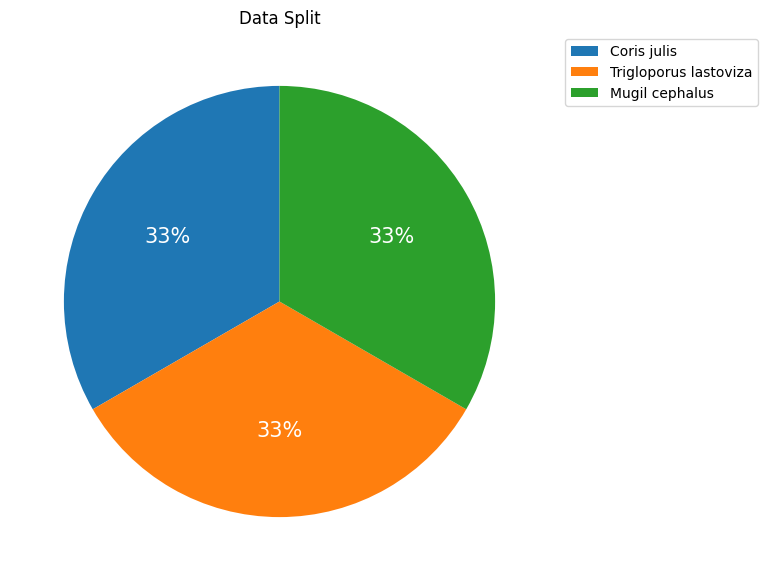

In [ ]:
# Tupel untuk menentukan jarak antar irisan dalam diagram pie
explode = (0, 0, 0)

# Membuat gambar untuk diagram pie dengan ukuran dan resolusi tertentu
plt.figure(figsize=(40, 7), dpi=100)

# Membuat diagram pie dengan ukuran, persentase angka, bayangan, properti teks, sudut awal, dan jarak antar irisan yang sudah ditentukan
plt.pie(x=sizes, autopct='%1.0f%%', shadow=False, textprops={'color': "w", "fontsize": 15}, startangle=90, explode=explode)

# Menambahkan legenda berdasarkan nama kelas
plt.legend(files, bbox_to_anchor=(0.7, 0, .7, 1))

# Menambahkan judul diagram pie
plt.title("Data Split")

# Menampilkan diagram pie
plt.show()

In [ ]:
# List untuk menyimpan data gambar
image_data = []

# List untuk menyimpan target kelas untuk setiap gambar
image_target = []

In [ ]:
def data_image(files):
    # Iterasi melalui setiap kelas
    for title in files:
        # Ubah direktori kerja ke direktori kelas saat ini
        os.chdir(file_path2.format(title))
        counter = 0

        # Iterasi melalui setiap gambar dalam kelas
        for i in data[title]:
            # Baca gambar menggunakan OpenCV
            img = cv2.imread(i)

            # Periksa apakah gambar berhasil dibaca
            if img is None:
                print("Failed to read image:", i)
                continue

            # Ubah format warna gambar menjadi RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Resize gambar sesuai dengan lebar dan tinggi yang ditentukan
            image_data.append(cv2.resize(img, (width, height)))
            # Tambahkan label kelas ke list target
            image_target.append(title)
            counter += 1

            # Berhenti jika sudah mencapai jumlah sampel yang diinginkan
            if counter == sample_size:
                break

        # Bersihkan output dan tampilkan pesan setelah selesai mengompilasi kelas saat ini
        clear_output(wait=True)
        print("Compiled Class", title)

In [ ]:
# Memulai menghitung waktu eksekusi
start = time.time()

# Memanggil fungsi data_image untuk mengisi image_data dan image_target
data_image(files)

# Menghitung waktu eksekusi
calculate_time = time.time() - start

# Menampilkan waktu eksekusi
print("Calculate Time", round(calculate_time,5))

Compiled Class Coris julis


In [ ]:
# Mengkonversi list image_data menjadi array NumPy
image_data = np.array(image_data)

# Mendapatkan jumlah sampel dalam dataset
size = image_data.shape[0]

# Menampilkan dimensi array image_data
image_data.shape

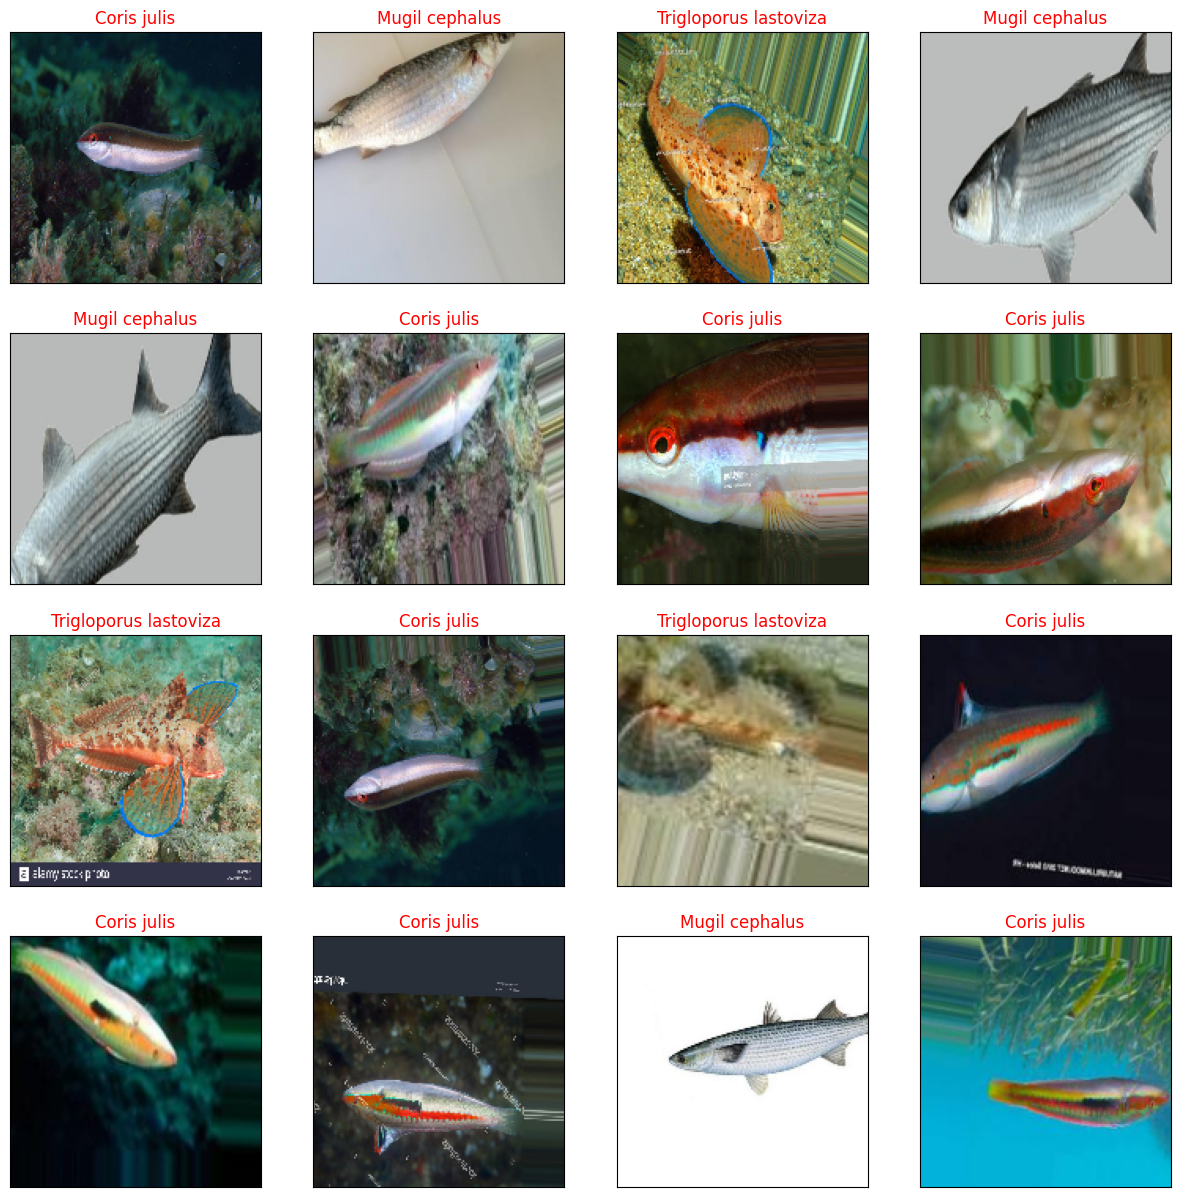

In [ ]:
# Membuat gambar dengan ukuran tertentu
plt.figure(figsize=(15, 15))

# Memilih 16 sampel acak dari dataset
for i in range(1, 17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4, 4, i)
    # Menampilkan gambar
    plt.imshow(image_data[fig])
    # Menampilkan label kelas sebagai judul dengan warna merah
    plt.title(image_target[fig], color='red')
    plt.xticks([]), plt.yticks([])

# Menampilkan gambar-gambar yang telah dipilih
plt.show()

In [ ]:
# Membuat objek LabelEncoder
labels = LabelEncoder()

# Melatih LabelEncoder pada label kelas dari dataset
labels.fit(image_target)

LabelEncoder()

In [ ]:
# Mengonversi data gambar menjadi array NumPy dan dinormalisasi
X = np.array(image_data) / 255.0

# Mengonversi label kelas menjadi bilangan bulat menggunakan LabelEncoder
y = labels.transform(image_target)

# Membagi dataset menjadi data pelatihan dan data uji dengan rasio 70:30
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
def lr_scheduler(epoch):
    # Menghitung kecepatan pembelajaran berdasarkan epoch
    return 0.001 * np.exp(-0.1 * epoch)

# Membuat callback LearningRateScheduler dengan fungsi lr_scheduler
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [ ]:
def toClass(pred):
    # Inisialisasi array kelas dengan panjang yang sama dengan jumlah prediksi
    class_ = np.zeros(len(pred))

    # Iterasi melalui setiap prediksi
    for i in range(len(pred)):
        # Mengambil indeks dengan nilai probabilitas tertinggi sebagai kelas prediksi
        index = pred[i].argmax()
        class_[i] = index
    return class_

In [ ]:
# Jumlah epochs yang akan digunakan dalam pelatihan model
epochs=16

# **BASIC MODEL CNN WITH TENSORFLOW**

In [ ]:
# Membuat model Sequential
basic_model = tf.keras.models.Sequential([
    # Layer konvolusi pertama dengan 32 filter, ukuran kernel 3x3, dan fungsi aktivasi ReLU
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(width, height, 3)),
    # Layer pooling pertama dengan ukuran pool 2x2
    tf.keras.layers.MaxPooling2D(2, 2),
    # Layer konvolusi kedua dengan 64 filter, ukuran kernel 3x3, dan fungsi aktivasi ReLU
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # Layer pooling kedua dengan ukuran pool 2x2
    tf.keras.layers.MaxPooling2D(2,2),
    # Layer konvolusi ketiga dengan 128 filter, ukuran kernel 3x3, fungsi aktivasi ReLU, dan regularisasi L2
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # Layer pooling ketiga dengan ukuran pool 2x2
    tf.keras.layers.MaxPooling2D(2,2),
    # Layer flatten untuk mengubah matriks menjadi vektor
    tf.keras.layers.Flatten(),
    # Layer Dense dengan 64 unit dan fungsi aktivasi ReLU
    tf.keras.layers.Dense(64, activation='relu'),
    # Layer Dense dengan 128 unit dan fungsi aktivasi ReLU
    tf.keras.layers.Dense(128, activation='relu'),
    # Layer dropout untuk mengurangi overfitting
    tf.keras.layers.Dropout(0.4),
    # Layer output dengan 3 unit (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax
    tf.keras.layers.Dense(len(files), activation='softmax')
])

In [ ]:
# Membuat callback EarlyStopping untuk menghentikan pelatihan jika tidak ada peningkatan dalam metrik val_accuracy
# selama 10 epochs berturut-turut dan memulihkan bobot terbaik
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Metrik yang dipantau untuk menghentikan pelatihan
    patience=10,              # Jumlah epochs tanpa peningkatan sebelum pelatihan dihentikan
    restore_best_weights=True  # Memulihkan bobot terbaik yang menghasilkan metrik terbaik
)

In [ ]:
# Kompilasi model dengan menggunakan optimizer Adam dengan learning rate 0.0001,
# fungsi loss sparse_categorical_crossentropy untuk klasifikasi multi-kelas,
# dan metrik akurasi serta akurasi kategorikal untuk evaluasi performa model
basic_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Pengoptimal Adam dengan learning rate 0.0001
    loss='sparse_categorical_crossentropy',  # Fungsi loss untuk klasifikasi multi-kelas
    metrics=['accuracy', tf.keras.metrics.CategoricalAccuracy()]  # Metrik evaluasi performa model
)

# Menampilkan ringkasan arsitektur model
basic_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 79, 79, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 128)       0

In [ ]:
# Melatih model menggunakan data pelatihan dan data uji, dengan jumlah epochs yang telah ditentukan
# serta data validasi yang digunakan untuk memonitor performa model pada setiap epoch
# Callback lr_callback digunakan untuk mengatur kecepatan pembelajaran,
# dan callback callback digunakan untuk menghentikan pelatihan jika tidak ada peningkatan dalam metrik val_accuracy
history_basic_model = basic_model.fit(
    train_images,  # Data gambar pelatihan
    train_labels,  # Label kelas pelatihan
    epochs=epochs,  # Jumlah epochs
    validation_data=(test_images, test_labels),  # Data validasi (data uji)
    callbacks=[lr_callback, callback]  # Callback untuk mengatur kecepatan pembelajaran dan EarlyStopping
)

In [ ]:
# Mengatur gaya plot menggunakan ggplot
plt.style.use('ggplot')

# Membuat gambar dengan ukuran tertentu
plt.figure(figsize=(10, 5))

# Menambahkan judul plot
plt.title('Model Accuracy')

# Menampilkan garis plot untuk akurasi pelatihan dan validasi
plt.plot(history_basic_model.history['accuracy'], label='Accuracy (Train)')
plt.plot(history_basic_model.history['val_accuracy'], label='Accuracy (Validation)')
plt.plot(history_basic_model.history['categorical_accuracy'], label='Categorical Accuracy (Train)')
plt.plot(history_basic_model.history['val_categorical_accuracy'], label='Categorical Accuracy (Validation)')

# Menambahkan label sumbu x dan y
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Menetapkan batas untuk sumbu y
plt.ylim([0, 1.01])

# Menambahkan legenda ke plot
plt.legend(loc='lower right')

# Evaluasi akurasi model menggunakan data uji dan menampilkan nilai akurasi
test_acc_basic_model = basic_model.evaluate(test_images, test_labels, verbose=2)

# Menampilkan plot
plt.show()

In [ ]:
# Membuat plot loss model untuk data pelatihan dan validasi (data uji)
plt.plot(history_basic_model.history['loss'], label='Training Loss')
plt.plot(history_basic_model.history['val_loss'], label='Validation Loss')

# Menambahkan judul plot
plt.title('Model Loss')

# Menambahkan label sumbu x dan y
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Menampilkan legenda
plt.legend(['Train', 'Test'], loc='upper left')

# Menampilkan plot
plt.show()

In [ ]:
# Melakukan prediksi menggunakan model terhadap data uji
y_pred = basic_model.predict(test_images)

# Menghitung confusion matrix
cm = confusion_matrix(test_labels, toClass(y_pred))

# Membuat DataFrame dari confusion matrix
df1 = pd.DataFrame(columns=files, index=files, data=cm)

# Membuat heatmap confusion matrix
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df1, annot=True, cmap="Greens", fmt='.0f', ax=ax, linewidths=5, cbar=False, annot_kws={"size": 16})

# Menambahkan label sumbu x dan y serta judul plot
plt.xlabel("Predicted Label")
plt.xticks(size=12)
plt.yticks(size=12, rotation=0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size=12)

# Menampilkan plot
plt.show()

# **TRANSFER LEARNING WITH MOBILENET V2**

In [ ]:
# Menggunakan pre-trained MobileNetV2 sebagai base model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(width, height, 3),  # Bentuk input gambar
    include_top=False,  # Tidak termasuk fully-connected layers di bagian atas
    weights='imagenet'  # Menggunakan bobot yang telah dilatih pada dataset ImageNet
)

# Membekukan bobot base model agar tidak dilatih kembali selama proses fine-tuning
base_model.trainable = False

In [ ]:
# Membuat top-layer model di atas base model MobileNetV2
tl_model = models.Sequential([
    base_model,  # Base model MobileNetV2
    layers.GlobalAveragePooling2D(),  # Layer pooling global untuk mengurangi dimensi
    layers.Dense(64, activation='relu'),  # Layer dense dengan 64 unit dan fungsi aktivasi ReLU
    layers.Dropout(0.5),  # Layer dropout untuk mengurangi overfitting
    layers.Dense(3, activation='softmax')  # Layer output dengan 3 unit (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax
])

In [ ]:
# Kompilasi top-layer model dengan menggunakan optimizer Adam dengan learning rate 0.0001,
# fungsi loss sparse_categorical_crossentropy untuk klasifikasi multi-kelas,
# dan metrik akurasi serta akurasi kategorikal untuk evaluasi performa model
tl_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Pengoptimal Adam dengan learning rate 0.0001
    loss='sparse_categorical_crossentropy',  # Fungsi loss untuk klasifikasi multi-kelas
    metrics=['accuracy', tf.keras.metrics.CategoricalAccuracy()]  # Metrik evaluasi performa model
)

# Menampilkan ringkasan arsitektur top-layer model
tl_model.summary()

In [ ]:
# Melatih top-layer model menggunakan data pelatihan dan data uji, dengan jumlah epochs yang telah ditentukan
# serta data validasi yang digunakan untuk memonitor performa model pada setiap epoch
# Callback lr_callback digunakan untuk mengatur kecepatan pembelajaran,
# dan callback callback digunakan untuk menghentikan pelatihan jika tidak ada peningkatan dalam metrik val_accuracy
history_tl_model = tl_model.fit(
    train_images,  # Data gambar pelatihan
    train_labels,  # Label kelas pelatihan
    epochs=epochs,  # Jumlah epochs
    validation_data=(test_images, test_labels),  # Data validasi (data uji)
    callbacks=[lr_callback, callback]  # Callback untuk mengatur kecepatan pembelajaran dan EarlyStopping
)

In [ ]:
# Mengatur gaya plot menggunakan ggplot
plt.style.use('ggplot')

# Membuat gambar dengan ukuran tertentu
plt.figure(figsize=(10, 5))

# Menambahkan judul plot
plt.title('Model Accuracy')

# Menampilkan garis plot untuk akurasi pelatihan dan validasi
plt.plot(history_tl_model.history['accuracy'], label='Accuracy (Train)')
plt.plot(history_tl_model.history['val_accuracy'], label='Accuracy (Validation)')
plt.plot(history_tl_model.history['categorical_accuracy'], label='Categorical Accuracy (Train)')
plt.plot(history_tl_model.history['val_categorical_accuracy'], label='Categorical Accuracy (Validation)')

# Menambahkan label sumbu x dan y
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Menetapkan batas untuk sumbu y
plt.ylim([0, 1.01])

# Menambahkan legenda ke plot
plt.legend(loc='lower right')

# Evaluasi akurasi model menggunakan data uji dan menampilkan nilai akurasi
test_acc_tl_model = tl_model.evaluate(test_images, test_labels, verbose=2)

# Menampilkan plot
plt.show()

In [ ]:
# Membuat plot loss model untuk data pelatihan dan validasi (data uji)
plt.plot(history_tl_model.history['loss'], label='Training Loss')
plt.plot(history_tl_model.history['val_loss'], label='Validation Loss')

# Menambahkan judul plot
plt.title('Model Loss')

# Menambahkan label sumbu x dan y
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Menampilkan legenda
plt.legend(['Train', 'Test'], loc='upper left')

# Menampilkan plot
plt.show()

In [ ]:
# Melakukan prediksi menggunakan top-layer model terhadap data uji
y_pred = tl_model.predict(test_images)

# Menghitung confusion matrix
cm = confusion_matrix(test_labels, toClass(y_pred))

# Membuat DataFrame dari confusion matrix
df1 = pd.DataFrame(columns=files, index=files, data=cm)

# Membuat heatmap confusion matrix
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df1, annot=True, cmap="Greens", fmt='.0f', ax=ax, linewidths=5, cbar=False, annot_kws={"size": 16})

# Menambahkan label sumbu x dan y serta judul plot
plt.xlabel("Predicted Label")
plt.xticks(size=12)
plt.yticks(size=12, rotation=0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size=12)

# Menampilkan plot
plt.show()

# **FINE TUNNING PARAMETER MODEL MOBILENET V2**

In [ ]:
# Menggunakan pre-trained MobileNetV2 sebagai base model untuk fine-tuning
ft_base_model = tf.keras.applications.MobileNetV2(
    input_shape=(width, height, 3),  # Bentuk input gambar
    include_top=False,  # Tidak termasuk fully-connected layers di bagian atas
    weights='imagenet'  # Menggunakan bobot yang telah dilatih pada dataset ImageNet
)

# Membekukan bobot base model agar tidak dilatih kembali selama proses fine-tuning
ft_base_model.trainable = False

In [ ]:
# Membuat fine-tuning model di atas base model MobileNetV2
ft_model = models.Sequential([
    ft_base_model,  # Base model MobileNetV2
    layers.GlobalAveragePooling2D(),  # Layer pooling global untuk mengurangi dimensi
    layers.Dense(64, activation='relu'),  # Layer dense dengan 64 unit dan fungsi aktivasi ReLU
    layers.Dropout(0.5),  # Layer dropout untuk mengurangi overfitting
    layers.Dense(3, activation='softmax')  # Layer output dengan 3 unit (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax
])

# Menampilkan ringkasan arsitektur fine-tuning model
ft_model.summary()

In [ ]:
print("Number of layers in the base model: ", len(ft_base_model.layers))

# Membuka kembali semua layer dalam base model untuk fine-tuning
ft_base_model.trainable = True

# Menentukan layer yang akan di-fine-tune
fine_tune_at = 150

# Mematikan trainability (trainable = False) untuk semua layer sebelum layer yang ditentukan untuk fine-tuning
for layer in ft_base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Menampilkan ringkasan arsitektur fine-tuning model setelah fine-tuning
ft_model.summary()

In [ ]:
# Kompilasi fine-tuning model dengan menggunakan optimizer Adam dengan learning rate 0.000001,
# fungsi loss sparse_categorical_crossentropy untuk klasifikasi multi-kelas,
# dan metrik akurasi serta akurasi kategorikal untuk evaluasi performa model
ft_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),  # Pengoptimal Adam dengan learning rate 0.000001
    loss='sparse_categorical_crossentropy',  # Fungsi loss untuk klasifikasi multi-kelas
    metrics=['accuracy', tf.keras.metrics.CategoricalAccuracy()]  # Metrik evaluasi performa model
)


In [ ]:
# Melatih fine-tuning model menggunakan data pelatihan dan data uji, dengan jumlah epochs yang telah ditentukan
# serta data validasi yang digunakan untuk memonitor performa model pada setiap epoch
# Callback lr_callback digunakan untuk mengatur kecepatan pembelajaran,
# dan callback callback digunakan untuk menghentikan pelatihan jika tidak ada peningkatan dalam metrik val_accuracy
history_ft_model = ft_model.fit(
    train_images,  # Data gambar pelatihan
    train_labels,  # Label kelas pelatihan
    epochs=epochs,  # Jumlah epochs
    validation_data=(test_images, test_labels),  # Data validasi (data uji)
    callbacks=[lr_callback, callback]  # Callback untuk mengatur kecepatan pembelajaran dan EarlyStopping
)

In [ ]:
# Mengatur gaya plot menggunakan ggplot
plt.style.use('ggplot')

# Membuat gambar dengan ukuran tertentu
plt.figure(figsize=(10, 5))

# Menambahkan judul plot
plt.title('Model Accuracy')

# Menampilkan garis plot untuk akurasi pelatihan dan validasi
plt.plot(history_ft_model.history['accuracy'], label='Accuracy (Train)')
plt.plot(history_ft_model.history['val_accuracy'], label='Accuracy (Validation)')
plt.plot(history_ft_model.history['categorical_accuracy'], label='Categorical Accuracy (Train)')
plt.plot(history_ft_model.history['val_categorical_accuracy'], label='Categorical Accuracy (Validation)')

# Menambahkan label sumbu x dan y
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Menetapkan batas untuk sumbu y
plt.ylim([0, 1.01])

# Menambahkan legenda ke plot
plt.legend(loc='lower right')

# Evaluasi akurasi model menggunakan data uji dan menampilkan nilai akurasi
test_acc_ft_model = ft_model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
# Plot loss dari fine-tuning model untuk data pelatihan dan validasi (data uji)
plt.plot(history_ft_model.history['loss'], label='Training Loss')
plt.plot(history_ft_model.history['val_loss'], label='Validation Loss')

# Menambahkan judul plot
plt.title('Model Loss')

# Menambahkan label sumbu x dan y
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Menampilkan legenda
plt.legend(['Train', 'Test'], loc='upper left')

# Menampilkan plot
plt.show()

In [ ]:
# Melakukan prediksi menggunakan fine-tuning model terhadap data uji
y_pred = ft_model.predict(test_images)

# Menghitung confusion matrix
cm = confusion_matrix(test_labels, toClass(y_pred))

# Membuat DataFrame dari confusion matrix
df1 = pd.DataFrame(columns=files, index=files, data=cm)

# Membuat heatmap confusion matrix
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df1, annot=True, cmap="Greens", fmt='.0f', ax=ax, linewidths=5, cbar=False, annot_kws={"size": 16})

# Menambahkan label sumbu x dan y serta judul plot
plt.xlabel("Predicted Label")
plt.xticks(size=12)
plt.yticks(size=12, rotation=0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size=12)

# Menampilkan plot
plt.show()

# **OTHER**

In [ ]:
# Menghitung presisi dari fine-tuning model terhadap data uji dengan rata-rata presisi macro
precision = metrics.precision_score(test_labels, toClass(y_pred), average='macro')

# Menampilkan nilai presisi
print('Precision: %f' % precision)

In [ ]:
# Menghitung recall dari fine-tuning model terhadap data uji dengan rata-rata recall macro
recall = metrics.recall_score(test_labels, toClass(y_pred), average='macro')

# Menampilkan nilai recall
print('Recall: %f' % recall)

In [ ]:
# Menghitung F1 score dari fine-tuning model terhadap data uji dengan rata-rata F1 macro
f1 = metrics.f1_score(test_labels, toClass(y_pred), average='macro')

# Menampilkan nilai F1 score
print('F1 score: %f' % f1)

In [ ]:
# Melatih fine-tuning model menggunakan data pelatihan dan data uji, dengan jumlah epochs yang telah ditentukan
# serta data validasi yang digunakan untuk memonitor performa model pada setiap epoch
# Callback lr_callback digunakan untuk mengatur kecepatan pembelajaran,
# dan callback callback digunakan untuk menghentikan pelatihan jika tidak ada peningkatan dalam metrik val_accuracy
history_ft = ft_model.fit(
    train_images,  # Data gambar pelatihan
    train_labels,  # Label kelas pelatihan
    epochs=epochs*2,  # Jumlah epochs, dua kali jumlah epochs yang sebelumnya
    validation_data=(test_images, test_labels),  # Data validasi (data uji)
    callbacks=[lr_callback, callback]  # Callback untuk mengatur kecepatan pembelajaran dan EarlyStopping
)

In [ ]:
# Melakukan prediksi menggunakan fine-tuning model terhadap data uji
y_pred = ft_model.predict(test_images)

# Menghitung confusion matrix
cm = confusion_matrix(test_labels, toClass(y_pred))

# Membuat DataFrame dari confusion matrix
df1 = pd.DataFrame(columns=files, index=files, data=cm)

# Membuat heatmap confusion matrix
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df1, annot=True, cmap="Greens", fmt='.0f', ax=ax, linewidths=5, cbar=False, annot_kws={"size": 16})

# Menambahkan label sumbu x dan y serta judul plot
plt.xlabel("Predicted Label")
plt.xticks(size=12)
plt.yticks(size=12, rotation=0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size=12)

# Menampilkan plot
plt.show()

In [ ]:
def Prediction2(test_image):
    """
    Fungsi untuk melakukan prediksi kelas gambar menggunakan fine-tuning model (ft_model).

    Args:
    - test_image: Gambar yang akan diprediksi kelasnya.

    Returns:
    - predicted_class: Kelas yang diprediksi oleh model untuk gambar input.
    """
    global width, height, files, labels  # Global variable untuk informasi model

    # Mengubah gambar input menjadi array numpy dan menyesuaikan dimensinya
    img = image.img_to_array(test_image)
    img = np.expand_dims(img, axis=0)

    # Normalisasi gambar
    img = img / 255.0

    # Melakukan prediksi menggunakan fine-tuning model
    pred = ft_model.predict(img)

    # Mendapatkan kelas yang diprediksi
    predicted_class = files[np.argmax(pred[0])]
    return predicted_class

In [ ]:
# Membuat plot untuk menampilkan gambar-gambar bersama dengan prediksi kelas
plt.figure(figsize=(15,15))
for i in range(1,17):
    # Memilih indeks acak dari data gambar
    fig = np.random.choice(np.arange(size))

    # Menampilkan gambar di subplot ke-i
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])

    # Menambahkan judul gambar dengan warna merah yang menunjukkan kelas asli
    plt.title(image_target[fig], color='red')

    # Melakukan prediksi kelas untuk gambar yang ditampilkan dan menambahkan label prediksi
    plt.ylabel("| Pred:{} |".format(Prediction2(image_data[fig])),fontsize=17, color='blue')

    # Menghilangkan sumbu x dan y
    plt.xticks([]), plt.yticks([])

# Menampilkan plot
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Path tempat data gambar "Phycis phycis" tersimpan
path_data = '/content/DATASETS/Phycis phycis'

# Memeriksa apakah direktori tempat data gambar ada
if not os.path.exists(path_data):
    print("Direktori tidak ditemukan:", path_data)

# Mendapatkan daftar file gambar dalam direktori
image_files = os.listdir(path_data)

# Jumlah data yang akan diuji
jumlah_data = 150

# Menghitung jumlah prediksi yang benar dan salah
benar = salah = 0

# Loop untuk menguji beberapa data dari kelas "Phycis phycis"
for idx in range(0, jumlah_data):
    index = idx
    image_file = os.path.join(path_data, image_files[index])

    print(image_files[index])

    # Memuat gambar dan menyesuaikan ukurannya
    img = image.load_img(image_file, target_size=(150, 150))

    # Menampilkan gambar
    imgplot = plt.imshow(img)

    # Mengonversi gambar menjadi array numpy, menambahkan dimensi, dan melakukan normalisasi
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    # Melakukan prediksi kelas menggunakan fine-tuning model
    classes = ft_model.predict(x, batch_size=1)

    # Mencetak rentang nilai prediksi
    nilai_min = np.min(classes)
    nilai_max = np.max(classes)
    print("Prediction range:")
    print("Minimum value:", nilai_min)
    print("Maximum value:", nilai_max)

    # Mendapatkan kelas yang diprediksi
    predicted_class = files[np.argmax(classes[0])]
    print('Grade:', predicted_class)

    # Memeriksa apakah prediksi benar atau salah
    if predicted_class == 'Phycis phycis':
        benar += 1
        print('BENAR')
    else:
        salah += 1
        print('SALAH')


Direktori tidak ditemukan: /content/DATASETS/Phycis phycis


FileNotFoundError: [Errno 2] No such file or directory: '/content/DATASETS/Phycis phycis'

In [ ]:
# Mencetak jumlah data yang diuji, jumlah prediksi yang benar, dan jumlah prediksi yang salah
print('DARI {} DATA YANG DI TESTING, BENAR {} DAN SALAH {}'.format(str(jumlah_data), str(benar), str(salah)))

In [ ]:
# Direktori tempat menyimpan model
model_dir = '/content/models/'

# Memeriksa apakah direktori sudah ada, jika belum, maka akan dibuat
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [ ]:
# Menyimpan model menggunakan metode normal
basic_model.save(model_dir + 'basic_cnn')  # Simpan model dasar (basic_model)
tl_model.save(model_dir + 'tranfer_learning')  # Simpan model transfer learning (tl_model)
ft_model.save(model_dir + 'fine_tunning')  # Simpan model fine-tuning (ft_model)

In [ ]:
# Menyimpan model menggunakan format H5
basic_model.save(os.path.join(model_dir, 'basic_cnn.h5'))  # Simpan model dasar (basic_model) dengan format H5
tl_model.save(os.path.join(model_dir, 'transfer_learning.h5'))  # Simpan model transfer learning (tl_model) dengan format H5
ft_model.save(os.path.join(model_dir, 'fine_tuning.h5'))  # Simpan model fine-tuning (ft_model) dengan format H5

In [ ]:
# shutil.rmtree('/content/models')